<a href="https://colab.research.google.com/github/Location-Artistry/GEO-DEV-NOTEBOOKS/blob/main/TRIPLY_TRANSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT GEOSPATIAL @TRIPLY**

---


## Eric Kerney 
Quick Project Prototype Workflow

In [ ]:
# Install GDAL and GeoPandas Libraries
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install pygeos 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install contextily
!pip install leafmap

In [ ]:
# Bring in the libraries that may be needed
import geopandas as gpd
import contextily as ctx
import datetime as dt
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import folium

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Coordinates for transit.land API request
c = [48.2082, 16.3738]

In [ ]:
# Wien transit stops within 10000 meters from center point
# Return as GeoJSON for visualizing in GeoPandas, must include API ket, transit.land API v1
url = (f'https://transit.land/api/v1/stops.geojson?lat={c[0]}&lon={c[1]}&r=10000&total=true&apikey=M8eo8IJQMohaAroJRbUAAnFqiWUv5GNI')
gdf = gpd.read_file(url)
gdfCol = gdf.columns

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   id                                  50 non-null     object  
 1   onestop_id                          50 non-null     object  
 2   created_at                          50 non-null     object  
 3   updated_at                          50 non-null     object  
 4   tags                                50 non-null     object  
 5   created_or_updated_in_changeset_id  50 non-null     int64   
 6   name                                50 non-null     object  
 7   timezone                            50 non-null     object  
 8   osm_way_id                          50 non-null     int64   
 9   parent_stop_onestop_id              0 non-null      object  
 10  wheelchair_boarding                 8 non-null      object  
 11  geometry_reversegeo       

In [ ]:
gdf.head().T

0  ...                                                  4
id                                                                s-u2ed5y0wtr-vienna  ...      s-u2edh6b451-viennaviennamatzleinsdorferplatz
onestop_id                                                        s-u2ed5y0wtr-vienna  ...      s-u2edh6b451-viennaviennamatzleinsdorferplatz
created_at                                           2016-04-22T22:43:52.145000+00:00  ...                   2016-10-13T15:53:08.267000+00:00
updated_at                                           2020-08-03T04:45:17.497000+00:00  ...                   2020-08-05T05:41:44.619999+00:00
tags                                {'stop_url': 'http://www.beanshuttle.com/en/st...  ...  {'stop_desc': 'Triester Straße 2, 1100 Wien, A...
created_or_updated_in_changeset_id                                               1162  ...                                               6195
name                                                                           Vienna  ...                Vienna, Vienna Matzleinsdorferplatz
timezone                                                                Europe/Prague  ...                                      Europe/Vienna
osm_way_id                                                                    4583259  ...                                          245474811
parent_stop_onestop_id                                                           None  ...                                               None
wheelchair_boarding                                                              None  ...                                              False
geometry_reversegeo                                                              None  ...                                               None
geometry_centroid                   {'type': 'Point', 'coordinates': [16.337592601...  ...  {'type': 'Point', 'coordinates': [16.35878, 48...
operators_serving_stop              [ { "operator_name": "Bean Shuttle", "operator...  ...  [ { "operator_name": "Flixbus", "operator_ones...
routes_serving_stop                 [ { "operator_name": "Bean Shuttle", "operator...  ...  [ { "operator_name": "Flixbus", "operator_ones...
title                                                             s-u2ed5y0wtr-vienna  ...      s-u2edh6b451-viennaviennamatzleinsdorferplatz
geometry                                  POINT (16.33759260177612 48.19817651938666)  ...                          POINT (16.35878 48.17952)

[17 rows x 5 columns]

In [ ]:
gdf = gdf.to_crs('EPSG:3857')

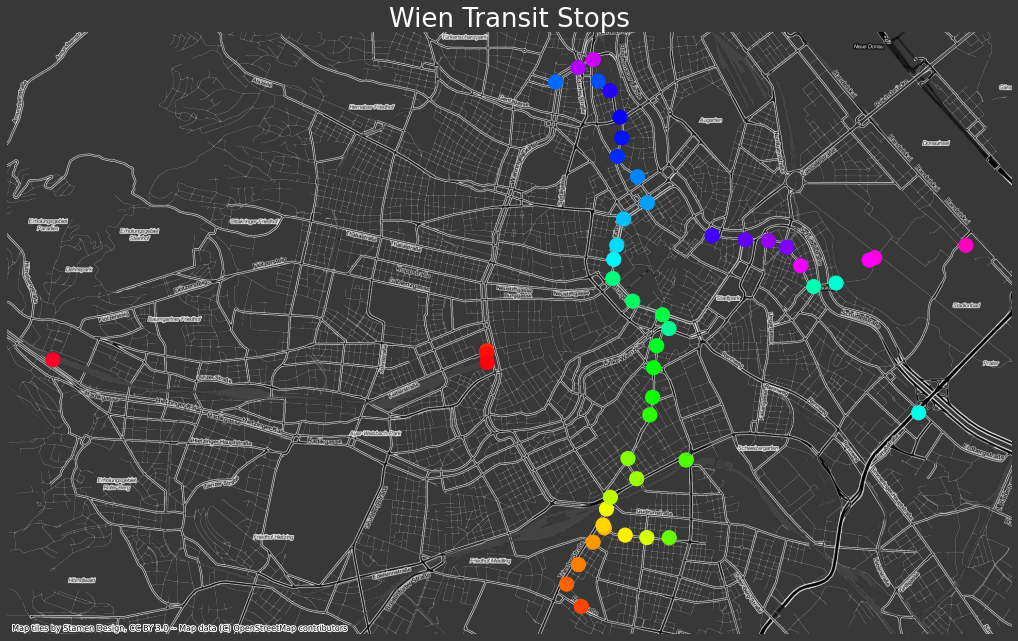

In [ ]:
# Show stops on maps with contextily basemap
fig, ax = plt.subplots(figsize=(18,20),facecolor='#383838')
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, column='id', legend=False, cmap='gist_rainbow',markersize=200)
plt.title("Wien Transit Stops", fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerHybrid, zorder=0)

In [ ]:
# create programmatic bounding box coordinates for Wien
# https://www.transit.land/documentation/datastore/api-endpoints 
# bbox is a search bounding box with southwest longitude, southwest latitude, northeast longitude, northeast latitude (separated by commas)
box = {'n':48.300,'s':48.000,'e':16.600,'w':16.200}

In [ ]:
# Let's try the API call with routes!
# test from the documentation
url = (f'https://transit.land/api/v1/routes.geojson?bbox=-122.4183,37.7758,-122.4120,37.7858&apikey=M8eo8IJQMohaAroJRbUAAnFqiWUv5GNI')
gdf2 = gpd.read_file(url)
gdf2Col = gdf2.columns

In [ ]:
# Let's try the API call with routes!
url = (f'https://transit.land/api/v1/routes.geojson?bbox={box["w"]},{box["s"]},{box["e"]},{box["n"]}&apikey=M8eo8IJQMohaAroJRbUAAnFqiWUv5GNI')
gdf2 = gpd.read_file(url)
gdf2Col = gdf2.columns

In [ ]:
gdf2.head().T

0  ...                                                  4
id                                                         r-u2e-ceskykrumlovtovienna  ...                                       r-u3-flixbus
onestop_id                                                 r-u2e-ceskykrumlovtovienna  ...                                       r-u3-flixbus
created_at                                           2016-04-22T22:43:52.169998+00:00  ...                   2016-11-23T19:16:22.709000+00:00
updated_at                                           2016-10-28T18:19:54.308998+00:00  ...                   2017-05-27T07:26:05.961000+00:00
tags                                {'route_url': 'http://www.beanshuttle.com/en/t...  ...  {'route_color': '73D700', 'route_long_name': '...
created_or_updated_in_changeset_id                                               1162  ...                                               6195
name                                                          Cesky Krumlov to Vienna  ...                                            FlixBus
vehicle_type                                                                      bus  ...                                                bus
color                                                                            None  ...                                             73D700
stops_served_by_route               [ { "stop_onestop_id": "s-u2djtvdmzz-eskkrumlo...  ...  [ { "stop_onestop_id": "s-u31f27w3j0-dresdendr...
operated_by_onestop_id                                              o-u2d-beanshuttle  ...                                        o-u-flixbus
operated_by_name                                                         Bean Shuttle  ...                                            Flixbus
wheelchair_accessible                                                         unknown  ...                                           no_trips
bikes_allowed                                                                 unknown  ...                                          all_trips
title                                                      r-u2e-ceskykrumlovtovienna  ...                                       r-u3-flixbus
geometry                            (LINESTRING (14.31862 48.81054, 15.16488 48.60...  ...  (LINESTRING (13.27928 52.50747, 13.28022 52.50...

[16 rows x 5 columns]

In [ ]:
gdf2 = gdf2.to_crs('EPSG:3857')

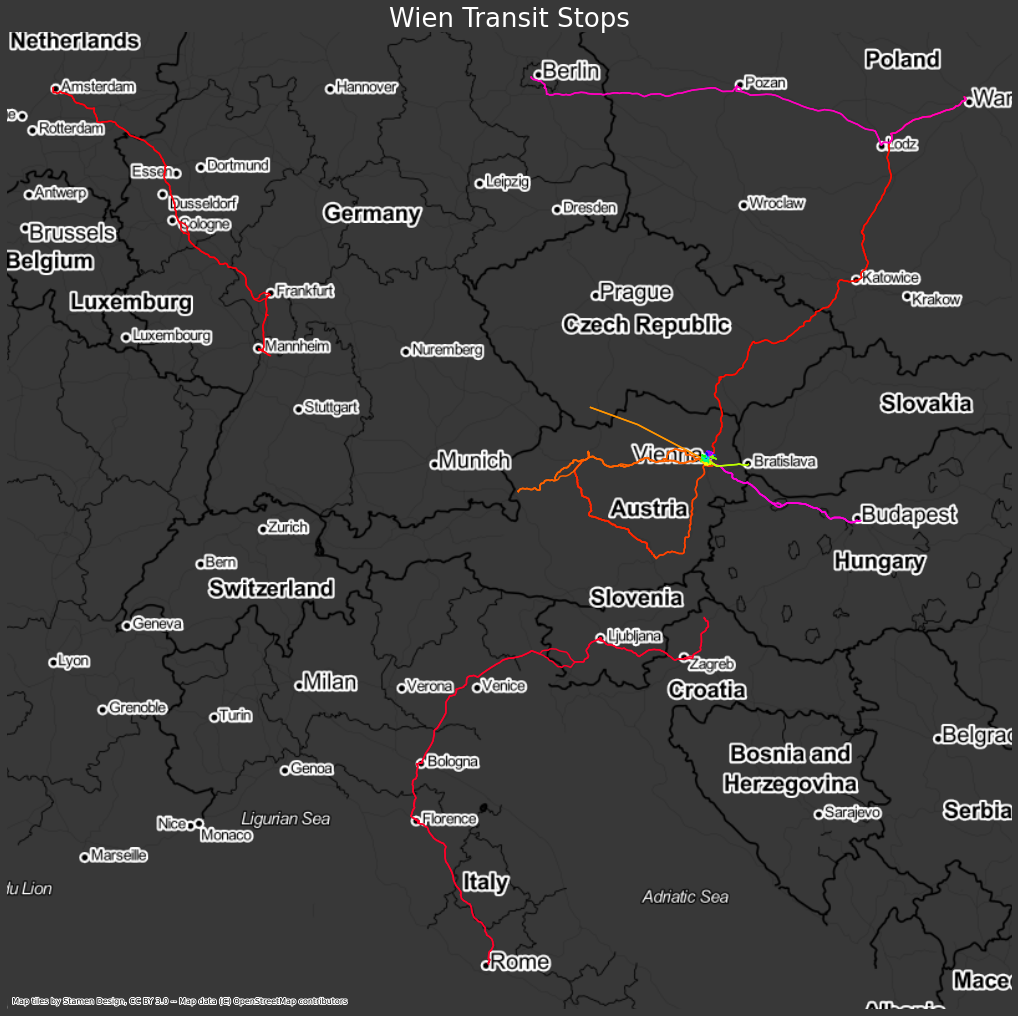

In [ ]:
# Show Wien routes, first map covered Poland to Rome!
fig, ax = plt.subplots(figsize=(18,20),facecolor='#383838')
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='id', legend=False, cmap='gist_rainbow',markersize=200)
plt.title("Wien Transit Stops", fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerHybrid, zorder=0)

In [ ]:
# create programmatic bounding box coordinates for Wien
# https://www.transit.land/documentation/datastore/api-endpoints 
# bbox is a search bounding box with southwest longitude, southwest latitude, northeast longitude, northeast latitude (separated by commas)
box = {'n':48.180,'s':48.160,'e':16.400,'w':16.360}

In [ ]:
# Let's try the API call with routes!
url = (f'https://transit.land/api/v1/routes.geojson?bbox={box["w"]},{box["s"]},{box["e"]},{box["n"]}&apikey=M8eo8IJQMohaAroJRbUAAnFqiWUv5GNI')
gdf2 = gpd.read_file(url)
gdf2Col = gdf2.columns

In [ ]:
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   id                                  29 non-null     object  
 1   onestop_id                          29 non-null     object  
 2   created_at                          29 non-null     object  
 3   updated_at                          29 non-null     object  
 4   tags                                29 non-null     object  
 5   created_or_updated_in_changeset_id  29 non-null     int64   
 6   name                                29 non-null     object  
 7   vehicle_type                        29 non-null     object  
 8   color                               26 non-null     object  
 9   stops_served_by_route               29 non-null     object  
 10  operated_by_onestop_id              29 non-null     object  
 11  operated_by_name          

In [ ]:
gdf2.head().T

0  ...                                                  4
id                                                                          r-u2edh-1  ...                                           r-u2ed-6
onestop_id                                                                  r-u2edh-1  ...                                           r-u2ed-6
created_at                                           2017-08-26T00:01:15.179000+00:00  ...                   2017-08-26T01:40:49.421001+00:00
updated_at                                           2020-01-13T02:26:26.233999+00:00  ...                   2018-11-29T08:44:53.155998+00:00
tags                                {'route_color': 'C00808', 'route_long_name': '...  ...  {'route_color': 'C00808', 'route_long_name': '...
created_or_updated_in_changeset_id                                              14722  ...                                              13363
name                                                                                1  ...                                                  6
vehicle_type                                                                     tram  ...                                               tram
color                                                                          C00808  ...                                             C00808
stops_served_by_route               [ { "stop_onestop_id": "s-u2edhd0nmb-leebgasse...  ...  [ { "stop_onestop_id": "s-u2edj8x2g6-fickeysst...
operated_by_onestop_id                                            o-u2ed-wienerlinien  ...                                o-u2ed-wienerlinien
operated_by_name                                                        Wiener Linien  ...                                      Wiener Linien
wheelchair_accessible                                                         unknown  ...                                            unknown
bikes_allowed                                                                 unknown  ...                                            unknown
title                                                                       r-u2edh-1  ...                                           r-u2ed-6
geometry                            (LINESTRING (16.34974 48.22986, 16.34993 48.22...  ...  (LINESTRING (16.33711 48.202, 16.33717 48.2017...

[16 rows x 5 columns]

In [ ]:
gdf2 = gdf2.to_crs('EPSG:3857')

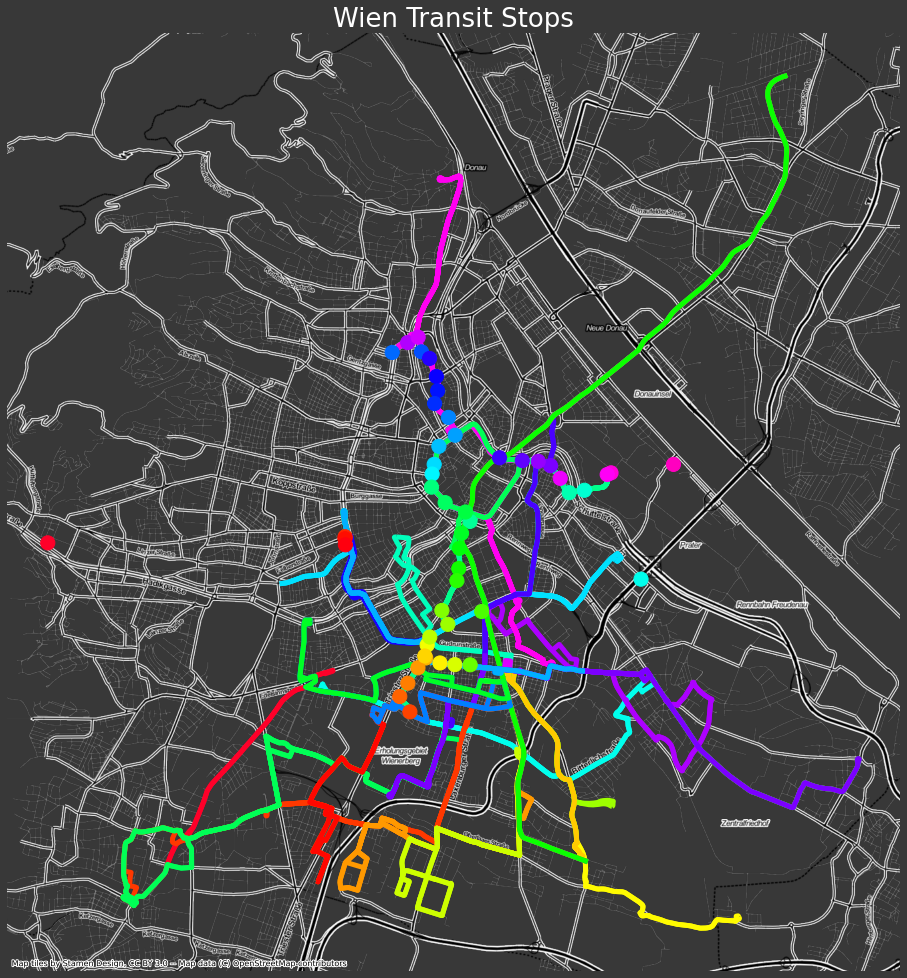

In [ ]:
# Show Wien routes, first map covered Poland to Rome!
fig, ax = plt.subplots(figsize=(16,18),facecolor='#383838')
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='id', legend=False, cmap='gist_rainbow',linewidth=5, zorder=1)
gdf.plot(ax=ax, column='id', legend=False, cmap='gist_rainbow',markersize=200,zorder=2)
plt.title("Wien Transit Stops", fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerHybrid, zorder=0)

## Initial Data Exploration Results
As a transit data exploration project, **Wien** is being used in place of *Hertberg*, which does not have any publically available transit data.  Using the transit.land API v1 we have been able to build a successful query request to obtain both the Stops and Routes in the Wien locale.  This query is then loaded into GeoPandas via the *read_file()* method which is able to generate a **geoDataframe(gdf)**.  A very basic pandas operation of info() and head().T are conducted to show total numeber of records and fields, and to list the attributes for each gdf.     
The Stops and Routes are then plotted together using the contextily library to provide a Stamen Dark basemap as background.  While this bounding box query for Routes should capture all available routes in the query, it appears that there are possibly additional transit routes that are not showing in the plot.  The following step explores additional methods for querying the API to determine if further transit methods are included.


In [ ]:
for i, x in enumerate(gdf2Col):
  print(f'{i} - {x}')

0 - id
1 - onestop_id
2 - created_at
3 - updated_at
4 - tags
5 - created_or_updated_in_changeset_id
6 - name
7 - vehicle_type
8 - color
9 - stops_served_by_route
10 - operated_by_onestop_id
11 - operated_by_name
12 - wheelchair_accessible
13 - bikes_allowed
14 - title
15 - geometry


In [ ]:
gdf2['operated_by_name'].describe()

count                29
unique                1
top       Wiener Linien
freq                 29
Name: operated_by_name, dtype: object

In [ ]:
gdf2[gdf2Col[7]].describe()

count      29
unique      3
top       bus
freq       19
Name: vehicle_type, dtype: object

In [ ]:
vehicle = gdf2.groupby(gdf2Col[7])[gdf2Col[0]].count()
vehicle

vehicle_type
bus      19
metro     2
tram      8
Name: id, dtype: int64

In [ ]:
opID = gdf2.groupby(gdf2Col[10])[gdf2Col[0]].count()
opID

operated_by_onestop_id
o-u2ed-wienerlinien    29
Name: id, dtype: int64

In [ ]:
# Retry Route query
# Let's try the API call with routes!
# Wien operator ID: o-u2ed-wienerlinien
url = (f'https://transit.land/api/v1/routes.geojson?operated_by=o-u2ed-wienerlinien&apikey=M8eo8IJQMohaAroJRbUAAnFqiWUv5GNI')
gdf3 = gpd.read_file(url)
c3 = gdf3.columns

In [ ]:
gdf3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   id                                  50 non-null     object  
 1   onestop_id                          50 non-null     object  
 2   created_at                          50 non-null     object  
 3   updated_at                          50 non-null     object  
 4   tags                                50 non-null     object  
 5   created_or_updated_in_changeset_id  50 non-null     int64   
 6   name                                50 non-null     object  
 7   vehicle_type                        50 non-null     object  
 8   color                               50 non-null     object  
 9   stops_served_by_route               50 non-null     object  
 10  operated_by_onestop_id              50 non-null     object  
 11  operated_by_name          

In [ ]:
gdf3 = gdf3.to_crs('EPSG:3857')

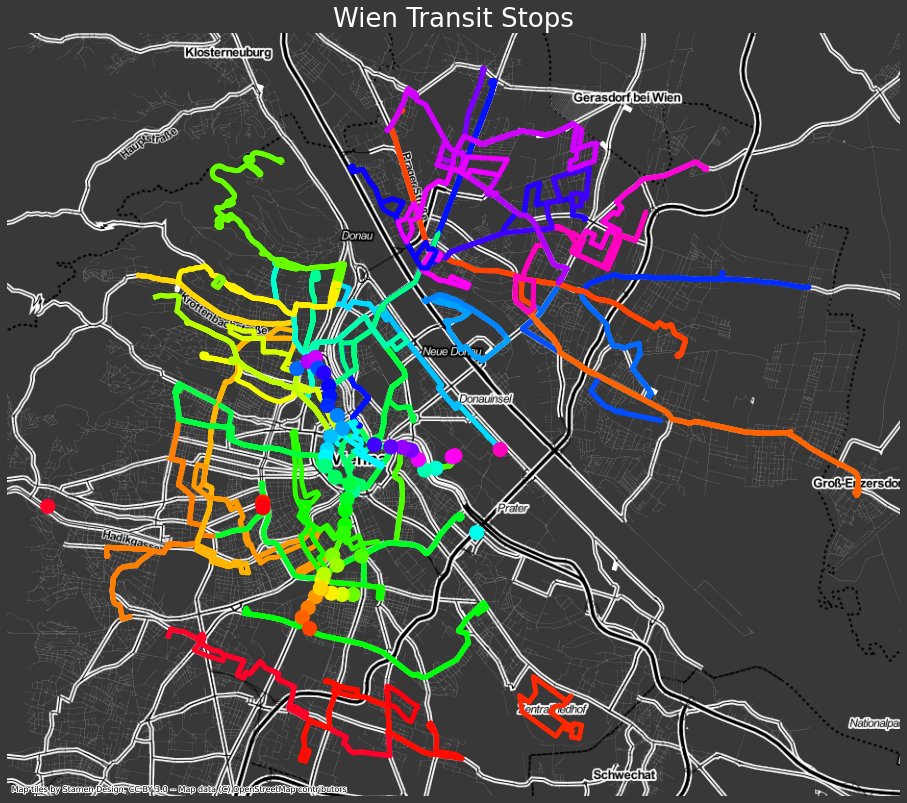

In [ ]:
# Show Wien routes, first map covered Poland to Rome!
fig, ax = plt.subplots(figsize=(16,18),facecolor='#383838')
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf3.plot(ax=ax, column='id', legend=False, cmap='gist_rainbow',linewidth=5, zorder=1)
gdf.plot(ax=ax, column='id', legend=False, cmap='gist_rainbow',markersize=200,zorder=2)
plt.title("Wien Transit Stops", fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerHybrid, zorder=0)

In [ ]:
# missing 2 metro routes from gdf2!
vehicle = gdf3.groupby(c3[7])[c3[0]].count()
vehicle

vehicle_type
bus     36
tram    14
Name: id, dtype: int64

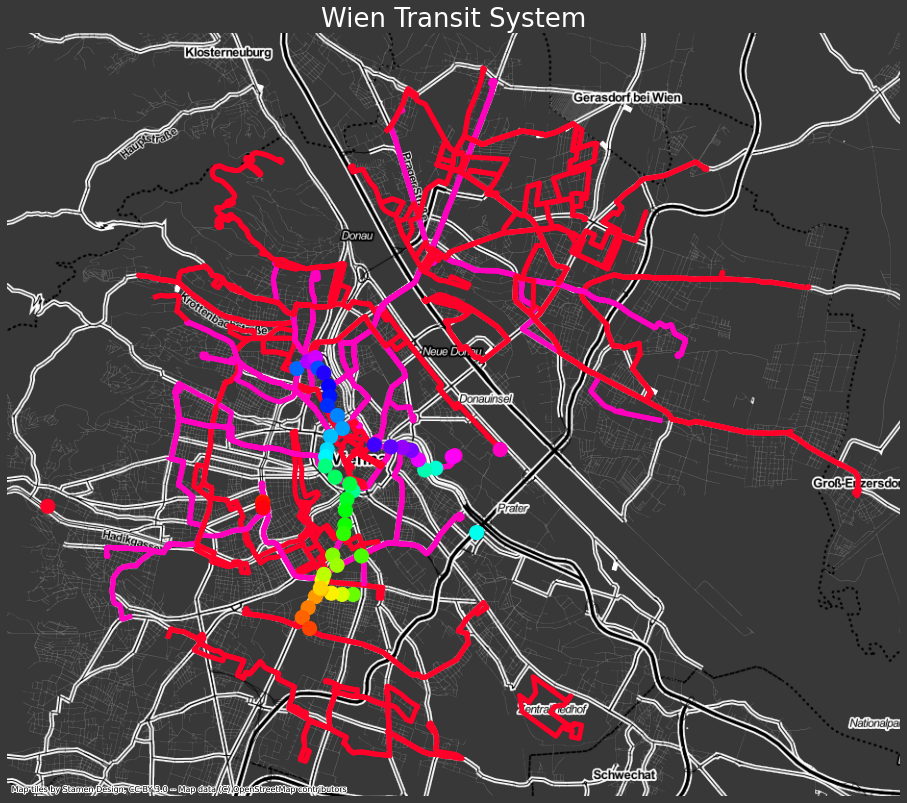

In [ ]:
fig, ax = plt.subplots(figsize=(16,18),facecolor='#383838')
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf3.plot(ax=ax, column='vehicle_type', legend=False, cmap='gist_rainbow',linewidth=5, zorder=1)
gdf.plot(ax=ax, column='id', legend=False, cmap='gist_rainbow',markersize=200,zorder=2)
plt.title("Wien Transit System", fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerHybrid, zorder=0)

In [ ]:
# map above finally shows most of the transit routes in the Wien system
# Below we explore the stops gdf (gdf) to find attributes that can link to the routes
# Eventual goal would be to color match the routes and the stops

In [ ]:
gdfCol

Index(['id', 'onestop_id', 'created_at', 'updated_at', 'tags',
       'created_or_updated_in_changeset_id', 'name', 'timezone', 'osm_way_id',
       'parent_stop_onestop_id', 'wheelchair_boarding', 'geometry_reversegeo',
       'geometry_centroid', 'operators_serving_stop', 'routes_serving_stop',
       'title', 'geometry'],
      dtype='object')

In [ ]:
stops = gdf.groupby(gdfCol[14])[gdfCol[0]].count()
stops

routes_serving_stop
[ { "operator_name": "Bean Shuttle", "operator_onestop_id": "o-u2d-beanshuttle", "route_name": "Cesky Krumlov to Vienna", "route_onestop_id": "r-u2e-ceskykrumlovtovienna" }, { "operator_name": "Bean Shuttle", "operator_onestop_id": "o-u2d-beanshuttle", "route_name": "Vienna to Cesky Krumlov", "route_onestop_id": "r-u2e-viennatoceskykrumlov" } ]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
# Retry Stops query
# Wien operator ID: o-u2ed-wienerlinien
url = (f'https://transit.land/api/v1/stops.geojson?served_by=o-u2ed-wienerlinien&apikey=M8eo8IJQMohaAroJRbUAAnFqiWUv5GNI')
gdf4 = gpd.read_file(url)
c4 = gdf4.columns

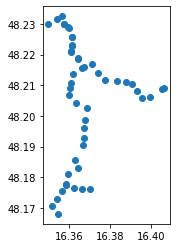

In [ ]:
gdf4.plot()

## Folium Mapping Section

In [ ]:
import folium
from folium.plugins import MousePosition
m = folium.Map(location=[48.2082, 16.3738])
formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"
MousePosition(position="topright",separator=" | ",empty_string="NaN",lng_first=True,num_digits=20,prefix="Coordinates:",lat_formatter=formatter,lng_formatter=formatter,).add_to(m)
m